In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [133]:
dados = 'C:\\Users\\dsadm\\Desktop\\Somativa_IABD\\Somativa_IABD\\dadosacoes.csv'


In [134]:
df = pd.read_csv(dados)

# Exibir as primeiras linhas
print(df.head())

  nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0     VALE3            194          45                            2134
1     SUZB3             91          71                            3069
2     SUZB3            165          41                            2815
3     SUZB3             56          34                            3613
4    GOOGLE            212           9                            2975


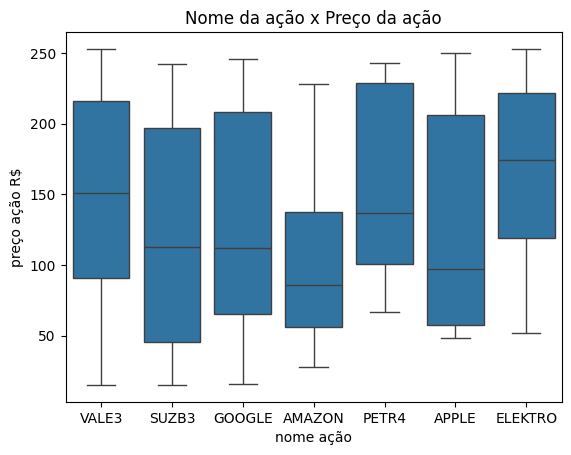

In [135]:
# Plotando o boxplot
sns.boxplot(x=df['nome ação'], y=df['preço ação R$'])
plt.title('Nome da ação x Preço da ação')
plt.show()

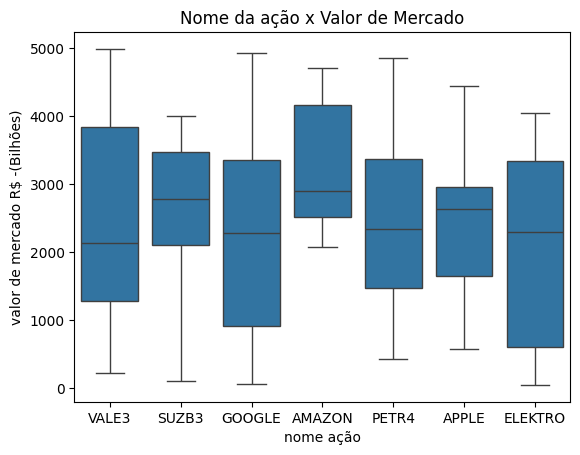

In [136]:
sns.boxplot(x=df['nome ação'], y=df['valor de mercado R$ -(Bilhões)'])
plt.title('Nome da ação x Valor de Mercado')
plt.show()

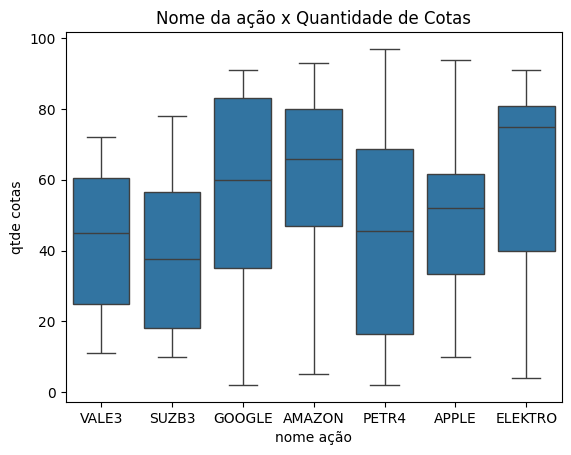

In [137]:
sns.boxplot(x=df['nome ação'], y=df['qtde cotas'])
plt.title('Nome da ação x Quantidade de Cotas')
plt.show()

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [139]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [184]:
# transforma a coluna de simbolos em true ou falso
df_dummies = pd.get_dummies(df,columns=['nome ação'],drop_first=True) 

In [185]:
print(df_dummies)

    preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0             194          45                            2134   
1              91          71                            3069   
2             165          41                            2815   
3              56          34                            3613   
4             212           9                            2975   
..            ...         ...                             ...   
95            208          78                            3035   
96            253          60                            3263   
97             99          35                             980   
98             82          43                            1866   
99            111          19                             230   

    nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  \
0             False              False             False            False   
1             False              False             False         

Soma dos Erros Quadráticos (SSE): 13687297.628437737


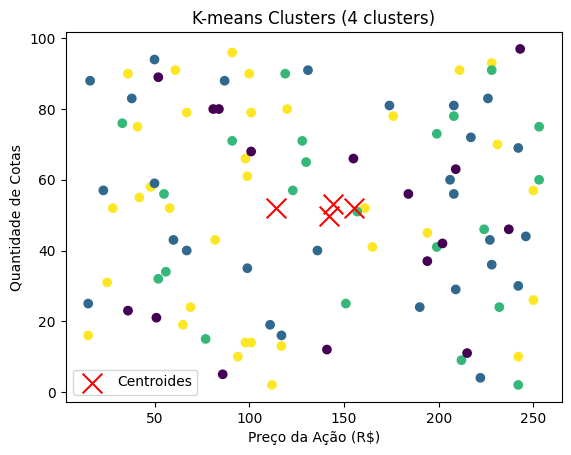

In [190]:
# Selecionando as colunas numéricas para aplicar o K-means
dados_ativos = df_dummies[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]


# Aplicando o K-means com n_clusters = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dados_ativos)

# Obter os rótulos dos clusters e os centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizando a soma dos erros quadráticos (SSE) para o modelo
sse = kmeans.inertia_
print('Soma dos Erros Quadráticos (SSE):', sse)

# Plotando o gráfico 2D
plt.scatter(df_dummies['preço ação R$'], df_dummies['qtde cotas'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroides')

# Adicionando título e labels aos eixos
plt.title('K-means Clusters (4 clusters)')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Quantidade de Cotas')

# Exibindo o gráfico
plt.legend()
plt.show()


Soma dos Erros Quadráticos (SSE) com 5 clusters: 9179720.83010989


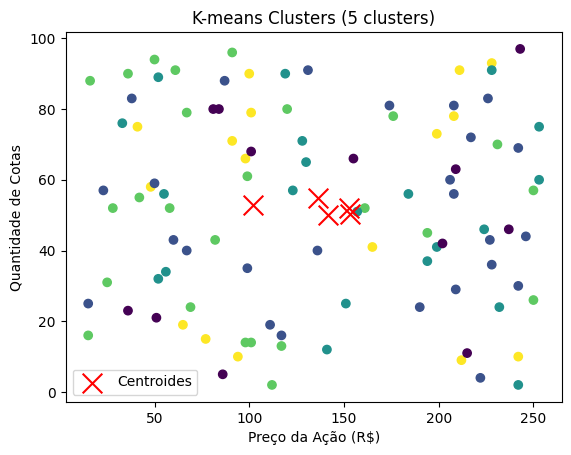

In [191]:
# Selecionando as colunas numéricas para aplicar o K-means
dados_ativos5 = df_dummies[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Aplicando o K-means com n_clusters = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(dados_ativos5)

# Obter os rótulos dos clusters e os centroides
labels_5 = kmeans_5.labels_
centroids_5 = kmeans_5.cluster_centers_

# Visualizando a soma dos erros quadráticos (SSE) para o modelo
sse_5 = kmeans_5.inertia_
print('Soma dos Erros Quadráticos (SSE) com 5 clusters:', sse_5)

# Plotando o gráfico 2D com 5 clusters
plt.scatter(df_dummies['preço ação R$'], df_dummies['qtde cotas'], c=labels_5, cmap='viridis')
plt.scatter(centroids_5[:, 0], centroids_5[:, 1], marker='x', color='red', s=200, label='Centroides')

# Adicionando título e labels aos eixos
plt.title('K-means Clusters (5 clusters)')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Quantidade de Cotas')

# Exibindo o gráfico
plt.legend()
plt.show()


Soma dos Erros Quadráticos (SSE) com 8 clusters: 3014043.875821238


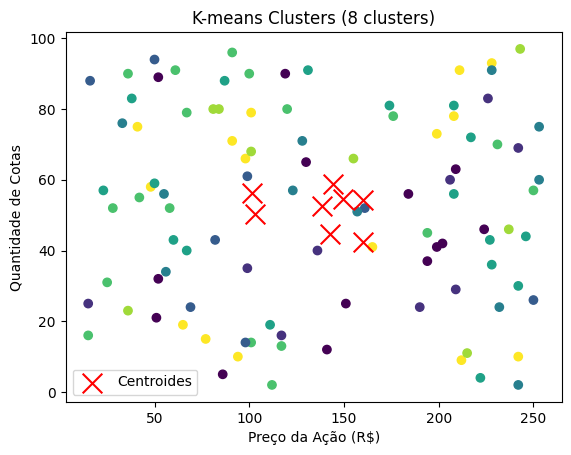

In [194]:
# Selecionando as colunas numéricas para aplicar o K-means
dados_ativos8 = df_dummies[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Aplicando o K-means com n_clusters = 8
kmeans_8 = KMeans(n_clusters=8, random_state=42)
kmeans_8.fit(dados_ativos8)

# Obter os rótulos dos clusters e os centroides
labels_8 = kmeans_8.labels_
centroids_8 = kmeans_8.cluster_centers_

# Visualizando a soma dos erros quadráticos (SSE) para o modelo
sse_8 = kmeans_8.inertia_
print('Soma dos Erros Quadráticos (SSE) com 8 clusters:', sse_8)

# Plotando o gráfico 2D com 8 clusters
plt.scatter(df_dummies['preço ação R$'], df_dummies['qtde cotas'], c=labels_8, cmap='viridis')
plt.scatter(centroids_8[:, 0], centroids_8[:, 1], marker='x', color='red', s=200, label='Centroides')

# Adicionando título e labels aos eixos
plt.title('K-means Clusters (8 clusters)')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Quantidade de Cotas')

# Exibindo o gráfico
plt.legend()
plt.show()


In [146]:
from sklearn.metrics import silhouette_score

In [147]:
def avaliacao(dados_ativos):
    inercia = []
    silhueta = []

In [148]:
def avaliacao(dados_ativos):
    inercia = []
    silhueta = []

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_ativos)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados_ativos, kmeans.predict(dados_ativos))))
        
    return silhueta, inercia

In [149]:
silhueta, inercia = avaliacao(dados_ativos)
silhueta

['k=2 - 0.5603594246539042',
 'k=3 - 0.6223500888313387',
 'k=4 - 0.5271387677297121']

In [150]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

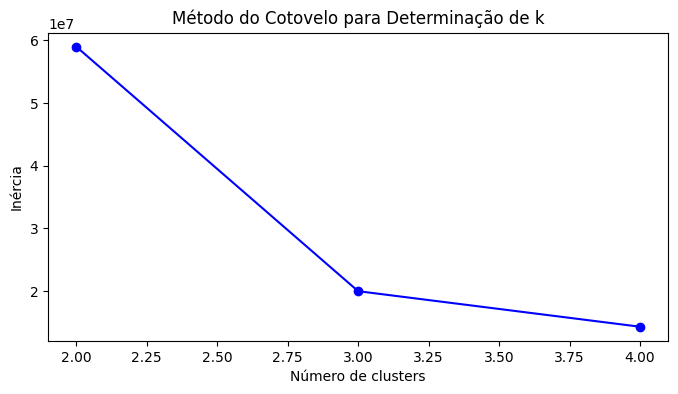

In [151]:
plot_cotovelo(inercia)

In [181]:
def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_ativos)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_ativos, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_ativos, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 3 clusters: 0.622


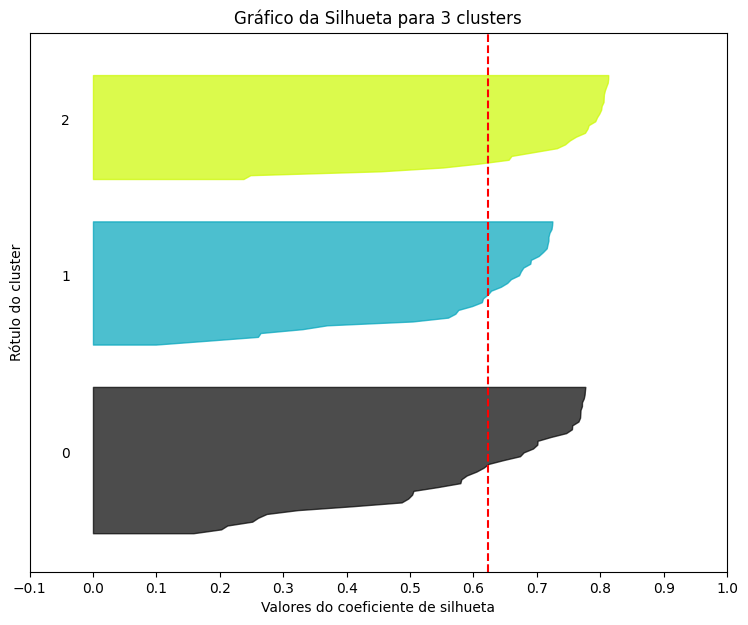

In [182]:
graf_silhueta(3,dados_ativos)

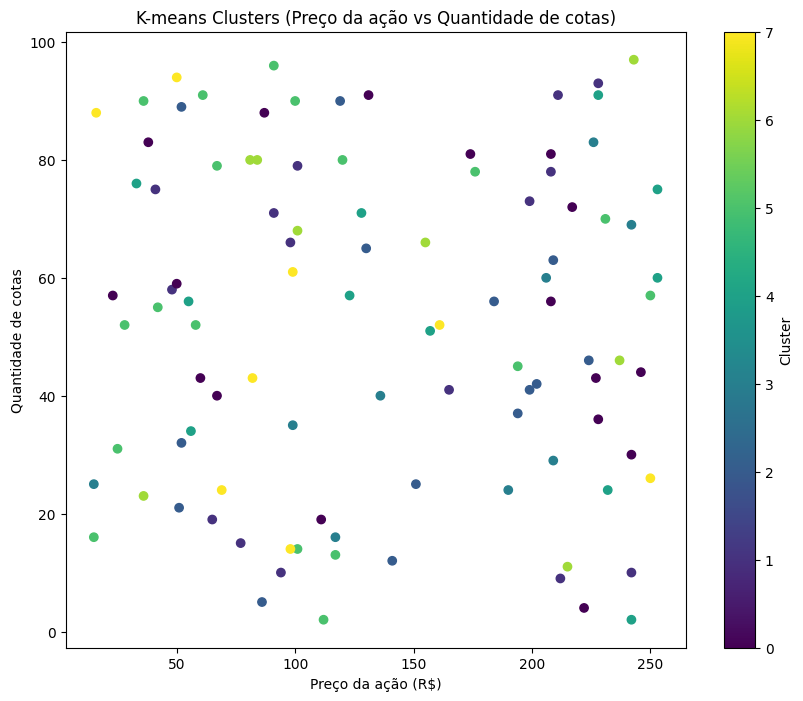

In [154]:
# Plotando o gráfico 2D (Preço da ação vs Quantidade de cotas)
plt.figure(figsize=(10, 8))
plt.scatter(df['preço ação R$'], df['qtde cotas'], c=labels, cmap='viridis')
plt.title('K-means Clusters (Preço da ação vs Quantidade de cotas)')
plt.xlabel('Preço da ação (R$)')
plt.ylabel('Quantidade de cotas')
plt.colorbar(label='Cluster')
plt.show()

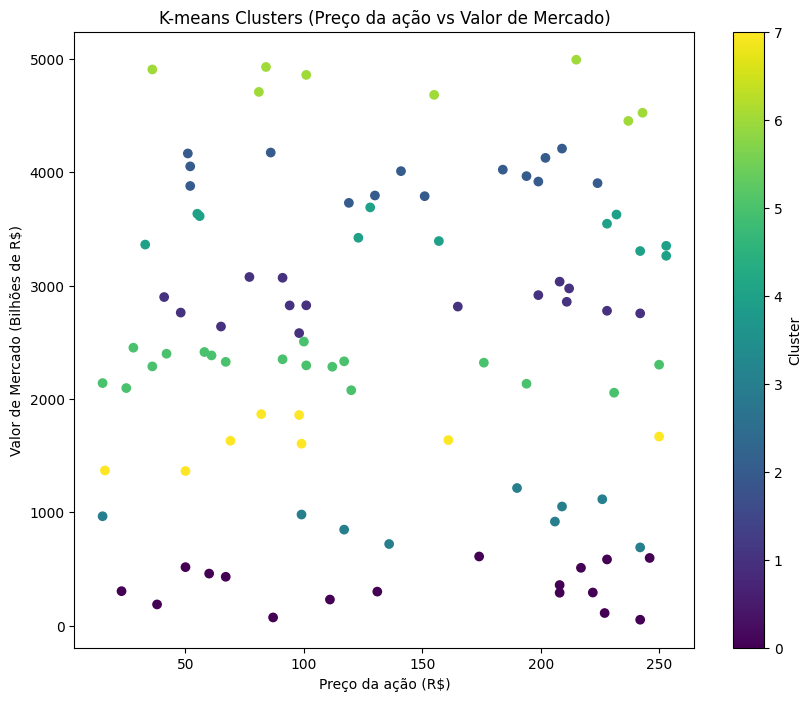

In [155]:
# Plotando o gráfico 2D (Preço da ação vs Valor de Mercado)
plt.figure(figsize=(10, 8))
plt.scatter(df['preço ação R$'], df['valor de mercado R$ -(Bilhões)'], c=labels, cmap='viridis')
plt.title('K-means Clusters (Preço da ação vs Valor de Mercado)')
plt.xlabel('Preço da ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões de R$)')
plt.colorbar(label='Cluster')
plt.show()


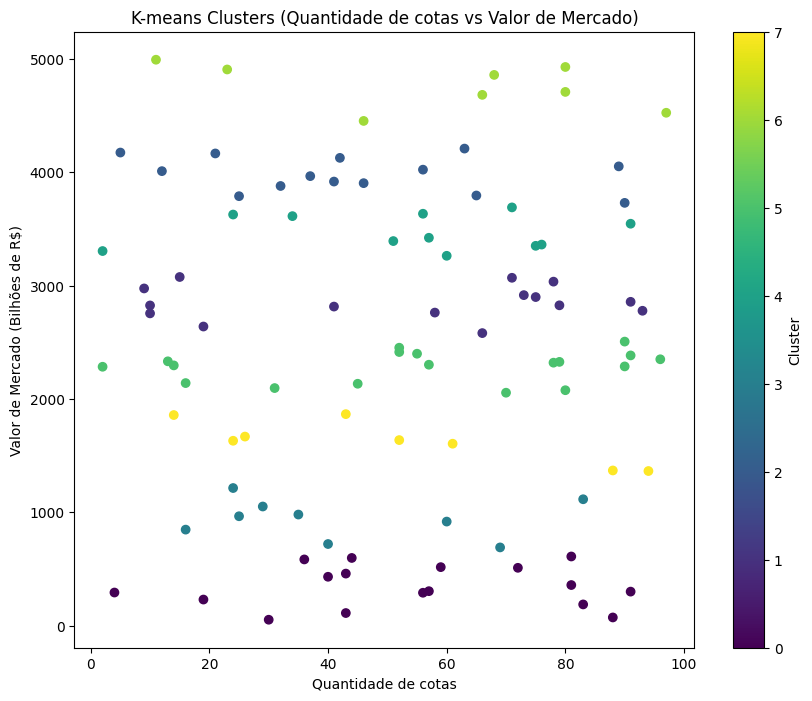

In [156]:
# Plotando o gráfico 2D (Quantidade de cotas vs Valor de Mercado)
plt.figure(figsize=(10, 8))
plt.scatter(df['qtde cotas'], df['valor de mercado R$ -(Bilhões)'], c=labels, cmap='viridis')
plt.title('K-means Clusters (Quantidade de cotas vs Valor de Mercado)')
plt.xlabel('Quantidade de cotas')
plt.ylabel('Valor de Mercado (Bilhões de R$)')
plt.colorbar(label='Cluster')
plt.show()


In [157]:
# Bibliotecas para plotar o gráfico em 3d
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Valor de Mercado')

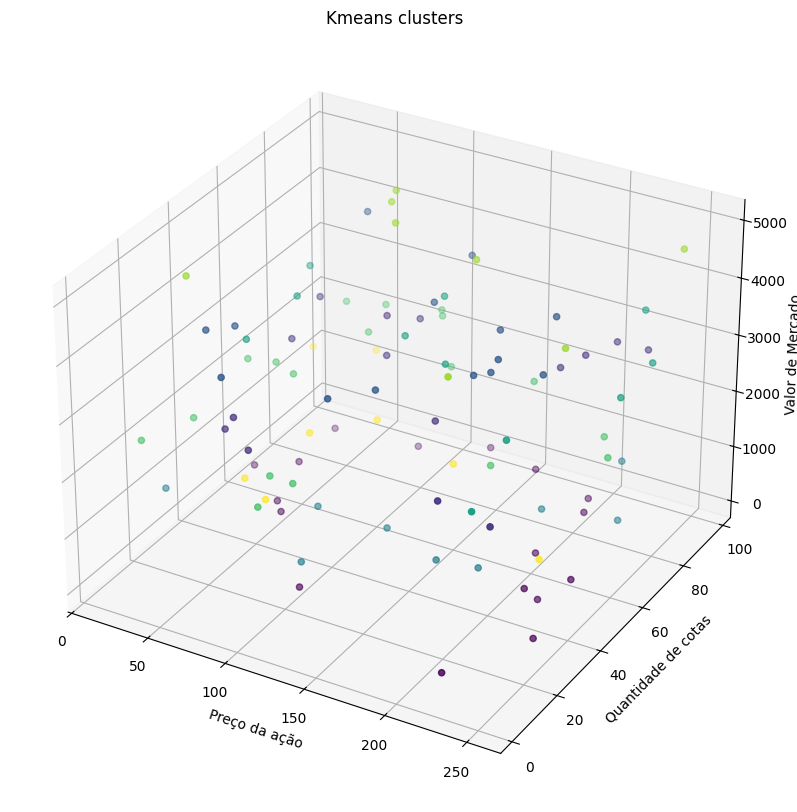

In [158]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['preço ação R$'],df['qtde cotas'],
           df['valor de mercado R$ -(Bilhões)'],c=labels)
ax.set_title('Kmeans clusters')
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de Mercado')

In [159]:
#Aprendizado supervisionado: Você tem um conjunto de imagens de frutas e deseja treinar um modelo 
# para identificar se uma fruta é uma maçã ou uma banana. Cada imagem de fruta já possui um rótulo.

#Aprendizado não supervisionado: Você tem um grande conjunto de imagens de frutas, mas não sabe se são maçãs, bananas, etc. 
# O modelo pode usar algoritmos de clustering (como K-means) para agrupar as imagens em categorias semelhantes, sem saber previamente quais frutas são essas.

#Resumo:
#A principal vantagem do aprendizado não supervisionado é sua capacidade de explorar
# dados não rotulados e descobrir estruturas e padrões que não são óbvios de imediato. E
# Ele oferece flexibilidade, permitindo que você extraia informações valiosas de grandes volumes de dados 
# sem a necessidade de rótulos e com menor custo em termos de preparação de dados.



